In [ ]:
import ipynb
#Importing all the modules from that file

#from ipynb.fs.full.Imports import *
from ipynb.fs.full.Project_functions import *
os.environ['SAS_BASE_DIR'] = '/global/cfs/cdirs/sdss/data/sdss' # this is to access the datacubes  locally
path='/global/homes/m/marta_r/_Multiprocessing/Getting_the_bins/Bin_4.csv'

i_obs=0 #Here we define what galaxy in the file we want to look at. This can be iterated over
the_data=pd.read_csv(path)
radius=np.asarray(the_data['radius'].tolist())
ifu_pl=np.asarray(the_data['Spectra'].tolist())
red=np.asarray(the_data['redhsift'].tolist())
plate_size=np.asarray(the_data['max'].tolist())
ratios=the_data['nsa_elpetro_ba'].tolist(); angles=the_data['nsa_elpetro_phi'].tolist()
cube = Cube(plateifu=ifu_pl[i_obs]) #data cube corresponding to that galaxy
zred=red[i_obs]
rads=radius[i_obs]; angle=angles[i_obs]; b=ratios[i_obs]*radius[i_obs] #Major axis, position angle, minor axis
rx=Ellipse_(rads,b,angle)[0] #Ellipse function to get the x values for the correspondong spaxels 
ry=Ellipse_(rads,b,angle)[1] #Ellipse function to get the y values for the correspondong spaxels 
count=0
flux_val=[]
ivar_val=[]
for j in range(len(rx)):
    spaxel = cube.getSpaxel(rx[count],ry[count]) #Getting the spaxels in an ellipse format
    wave=MaNGa_bad_wave(spaxel.flux.wavelength)[0] #Spaxel wavelength, MaNGa_bad_wave to remove the emission lines
    bad_len=MaNGa_bad_wave(spaxel.flux.wavelength)[1] #MaNGa_bad_wave[1] corresponds to the wavelenths that will
    #not be used here because they are greater than the DESI wavelentgth limit.
    flux_val.append(spaxel.flux.value[: len(spaxel.flux.value) - len(bad_len)]) #removing the flux values corresponding
    #to the bad wavelengths 
    ivar_val.append(spaxel.flux.ivar [: len(spaxel.flux.ivar ) - len(bad_len)] )
    count=count+1
flux=sum_quantities(flux_val) #this is to add the fluxes, so that we get the combined spectra 
ivar=sum_quantities(ivar_val)

use_flux, use_wave, use_ivar=masked_(wave,flux,ivar,zred)[1], masked_(wave,flux,ivar,zred)[0], masked_(wave,flux,ivar,zred)[2]
#the line above uses masked_ function to get the Wavelength, flux and ivar in the right format to be fitted
mass=mcmc_run(use_wave, use_flux, use_ivar, zred)[0]
mass_err=mcmc_run(use_wave, use_flux, use_ivar, zred)[1]
ssfr=mcmc_run(use_wave, use_flux, use_ivar, zred)[2] #this is specific star formation rate
ssfr_err=mcmc_run(use_wave, use_flux, use_ivar, zred)[3]
zw=mcmc_run(use_wave, use_flux, use_ivar, zred)[4]
zw_err=mcmc_run(use_wave, use_flux, use_ivar, zred)[5]
age=mcmc_run(use_wave, use_flux, use_ivar, zred)[6]
age_err=mcmc_run(use_wave, use_flux, use_ivar, zred)[7]
t_lookback=mcmc_run(use_wave, use_flux, use_ivar, zred)[8]
sfh=mcmc_run(use_wave, use_flux, use_ivar, zred)[9]
zh=mcmc_run(use_wave, use_flux, use_ivar, zred)[10]


Ellipse function:
<br>
The major axis is: 4.8265361813844505
<br>
The minor axis is: 2.012728332607674
<br>
The position angle is: 69.2463
<br>
The plate ifu is: 10001-12701
<br>

The following image is what one would get with the inputs above. 



<div>
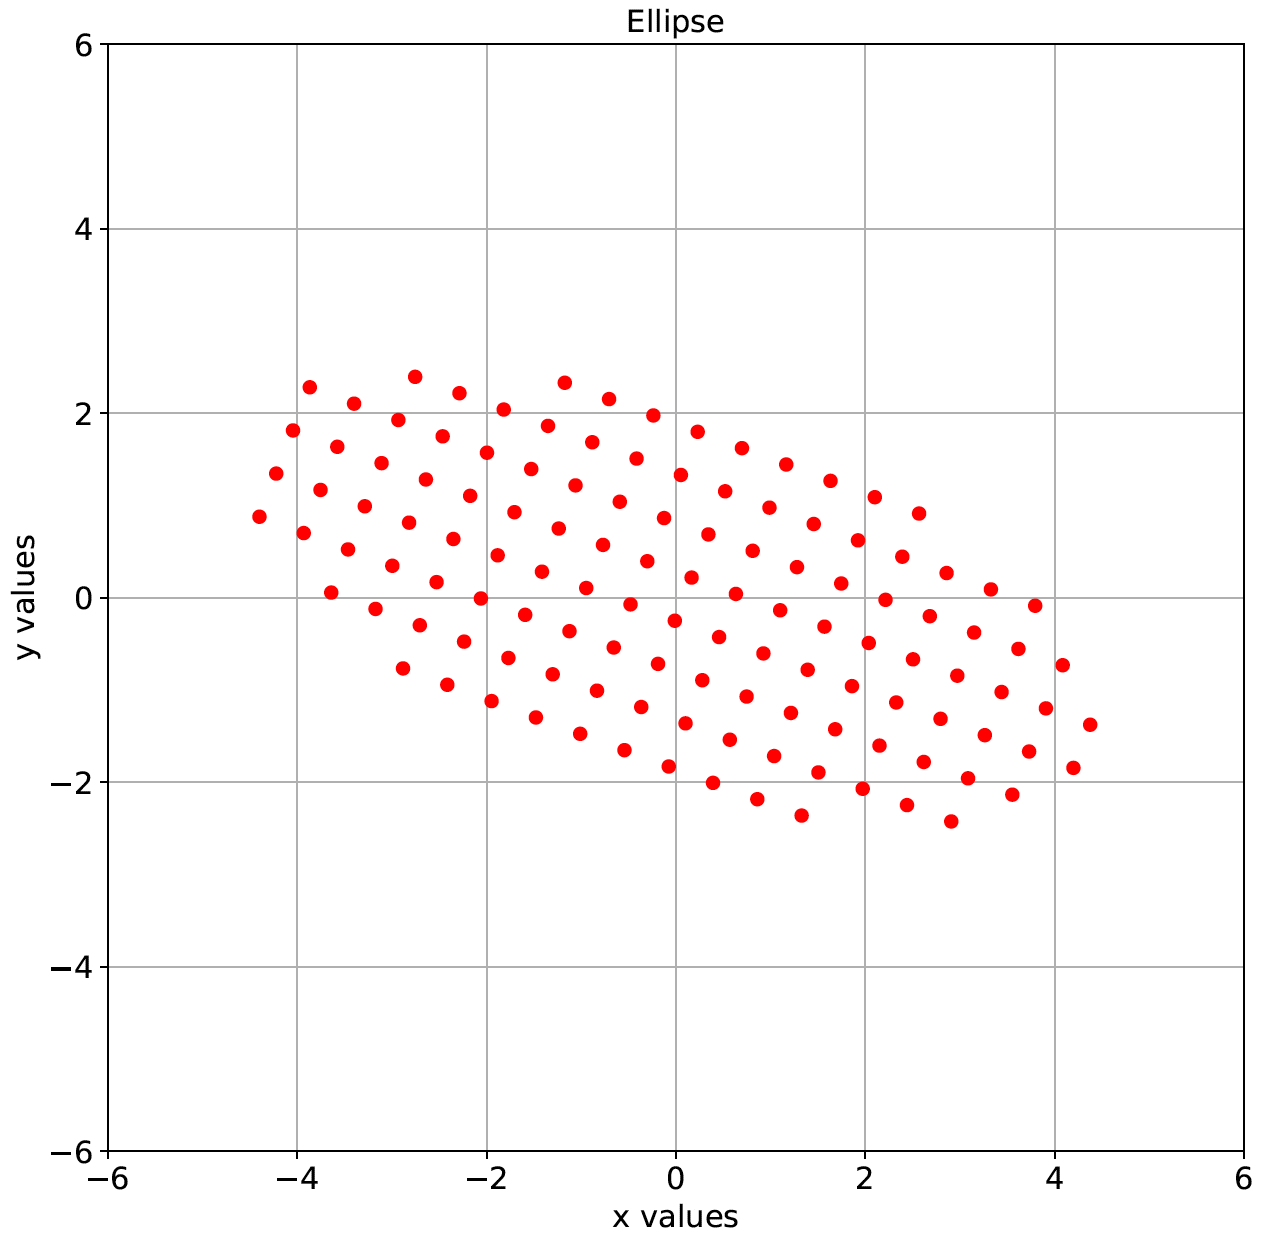
</div>

Using the galaxy above and the 'create_mask' function, we get the following masked spectra: 


<div>
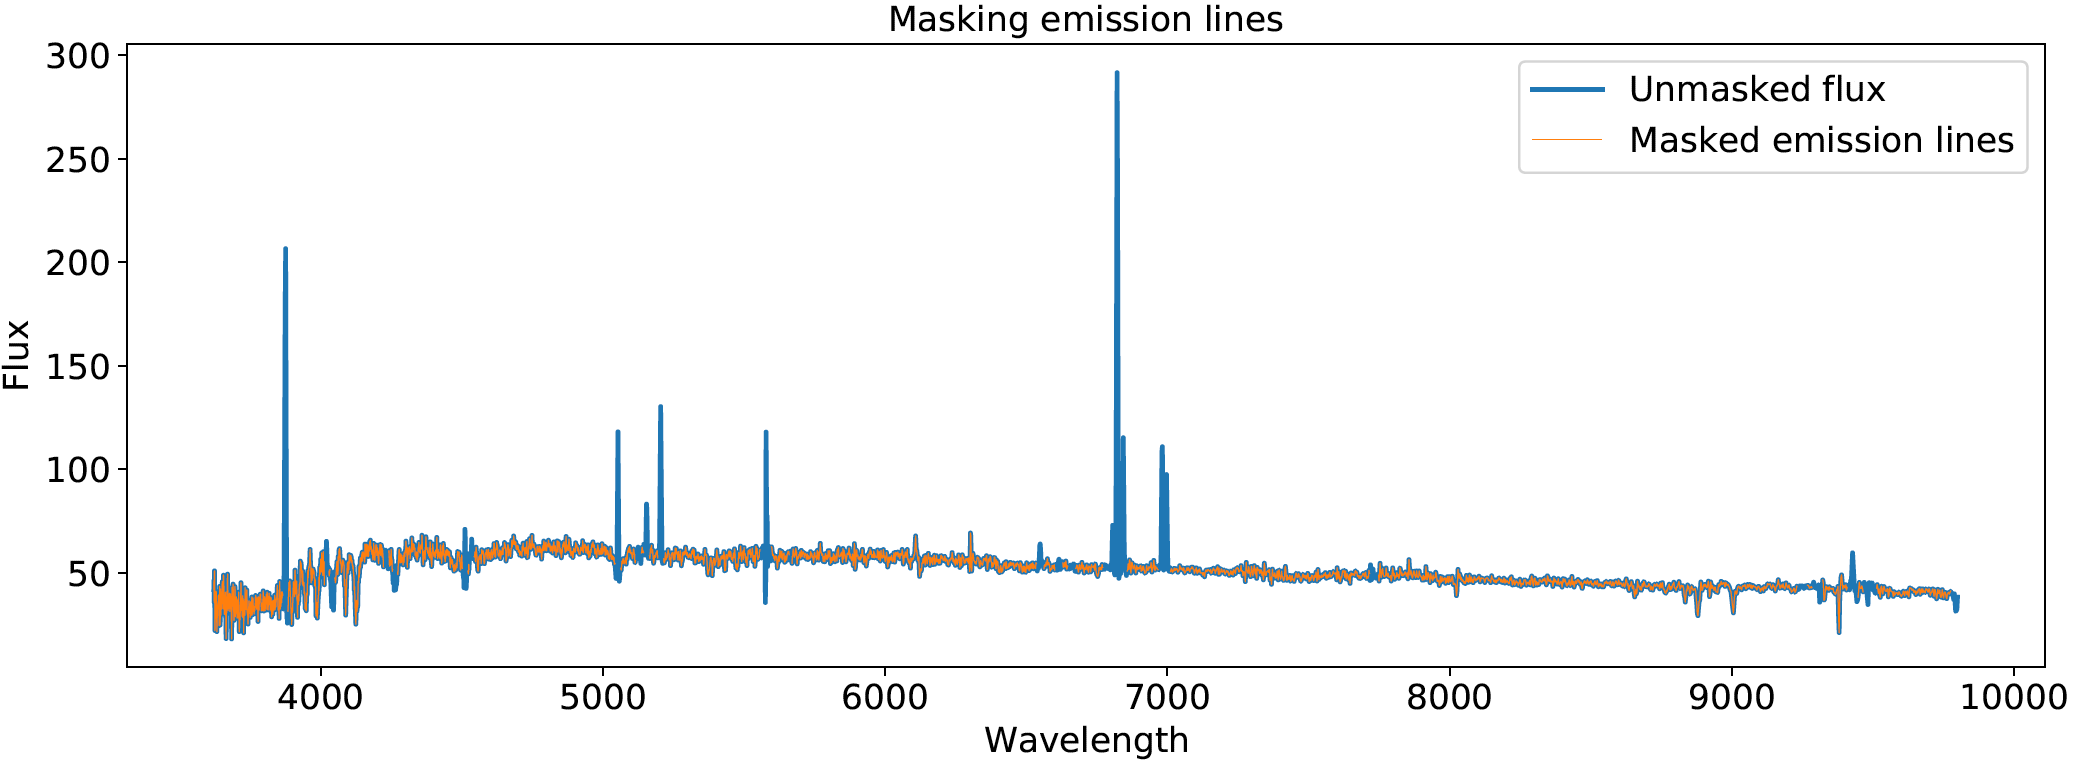
</div>

In the image above, the masked spectra corresponds to the combined spectra from all the spaxels.

Using MaNGa's IFU maps, one can see why using an ellipse, taking into accoun the position angle and axis ratio is important. This ensures that the spaxels chosen fall on the galaxy. Galaxy: 10519-12702


<div>
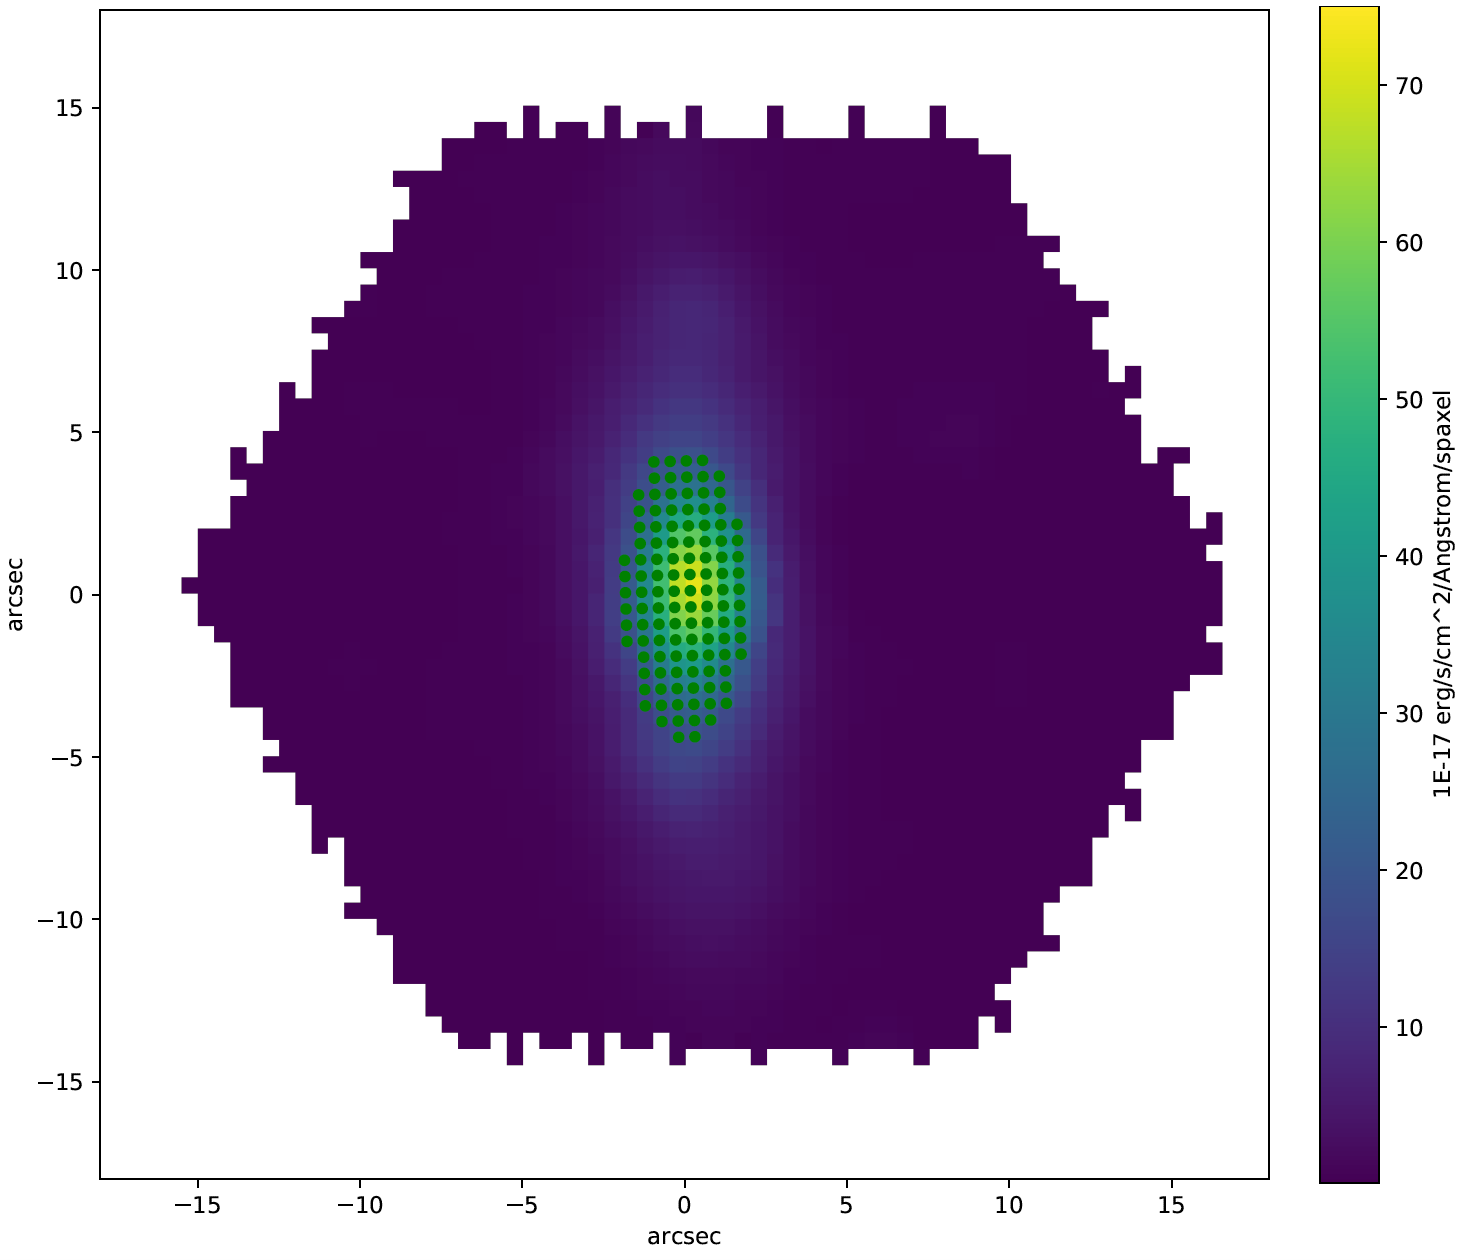
</div>